# Data Understanding

## Overview
After completing the business understanding phase and reviewing the dataset description provided by the professor, we have outlined the following approach for our analysis.

We are working with the file: `EuropeTop100Attractions_ENG_20190101_20210821.xlsx` (`input_file`)

In [15]:
import pandas as pd

input_file = "EuropeTop100Attractions_ENG_20190101_20210821.xlsx"

### Important Rows
We are focusing on data related to attractions from Portugal, Spain, France, Italy, and Greece, as these countries represent Portugal's main tourism competitors. The selected rows form the cleaned dataset, which will be used throughout the project. The IDs of these attractions are printed to ensure correct selection of data.

In [16]:
attractions_data = pd.read_excel(input_file, sheet_name='Attractions')

reviews_data = pd.read_excel(input_file, sheet_name='Reviews')

target_countries = ['Portugal', 'Spain', 'France', 'Italy', 'Greece']

filtered_attractions = attractions_data[attractions_data['Country'].isin(target_countries)]

target_ids = filtered_attractions['ID'].unique()

cleaned_data = reviews_data[reviews_data['localID'].isin(target_ids)]

#we use sep=';' because all group members have excel in portuguese
cleaned_data.to_csv("cleaned_data.csv", sep=';', index=False)

print("IDs for the selected countries (Portugal, Spain, France, Italy, Greece):")
print(target_ids)


IDs for the selected countries (Portugal, Spain, France, Italy, Greece):
['MAG001' 'MAG002' 'MAG004' 'MAG008' 'MAG009' 'MAG010' 'MAG011' 'MAG012'
 'MAG014' 'MAG015' 'MAG018' 'MAG019' 'MAG020' 'MAG021' 'MAG023' 'MAG025'
 'MAG030' 'MAG032' 'MAG033' 'MAG036' 'MAG038' 'MAG039' 'MAG044' 'MAG047'
 'MAG049' 'MAG050' 'MAG052' 'MAG055' 'MAG057' 'MAG058' 'MAG059' 'MAG062'
 'MAG064' 'MAG067' 'MAG068' 'MAG074' 'MAG077' 'MAG078' 'MAG081' 'MAG084'
 'MAG085' 'MAG086' 'MAG087' 'MAG089' 'MAG093' 'MAG094' 'MAG095' 'MAG096'
 'MAG097' 'MAG098' 'MAG099' 'MAG100']


### Handling Duplicates

To efficiently remove duplicate rows, we considered only the columns: `['userName', 'localID', 'reviewFullText']`.

In [17]:
cleaned_data_duplicates = cleaned_data.drop_duplicates(subset=['userName', 'localID', 'reviewFullText'])

cleaned_data_duplicates.to_csv("cleaned_data.csv", sep=';', index=False)
print("done")

done


### Analyzing Redundancy

We used Pearson's correlation coefficient to assess relationships between numerical columns.

In [18]:
numerical_columns = ['globalRating', 'positionOnRanking', 'sitesOnRanking', 'totalReviews', 'userContributions', 'reviewRating']
df_numeric_columns = cleaned_data_duplicates[numerical_columns]

pearson_corr = df_numeric_columns.corr(method='pearson')
print("Pearson's correlation coefficient matrix:\n", pearson_corr)

# Identify columns to be removed (correlation greater than 0.7 or less than -0.7, means strong correlation) 
cols_to_drop = set()
for i in range(pearson_corr.shape[0]):
    for j in range(i + 1, pearson_corr.shape[1]):
        if abs(pearson_corr.iloc[i, j]) > 0.7:
            cols_to_drop.add(pearson_corr.columns[j])

df_droped_columns = df_numeric_columns.drop(columns=cols_to_drop)
print("\nColumns removed by correlation:", cols_to_drop)

Pearson's correlation coefficient matrix:
                    globalRating  positionOnRanking  sitesOnRanking  \
globalRating           1.000000          -0.479253       -0.198560   
positionOnRanking     -0.479253           1.000000        0.345120   
sitesOnRanking        -0.198560           0.345120        1.000000   
totalReviews          -0.056429          -0.161685        0.615298   
userContributions      0.010758           0.009900       -0.019403   
reviewRating           0.219200          -0.178514       -0.014886   

                   totalReviews  userContributions  reviewRating  
globalRating          -0.056429           0.010758      0.219200  
positionOnRanking     -0.161685           0.009900     -0.178514  
sitesOnRanking         0.615298          -0.019403     -0.014886  
totalReviews           1.000000          -0.047510      0.063773  
userContributions     -0.047510           1.000000      0.011499  
reviewRating           0.063773           0.011499      1.000000

Based on the data obtained, no strong correlations (greater than 0.7 or less than -0.7) were found, so the dataset structure remains unchanged.

In [19]:
numerical_columns = ['globalRating', 'positionOnRanking', 'sitesOnRanking', 
                     'totalReviews', 'userContributions', 'reviewRating']

results = {'Column': [], 'Mean': [], 'Median': []}

for column in numerical_columns:
    if column in cleaned_data_duplicates.columns: 
        mean_value = cleaned_data_duplicates[column].mean()
        median_value = cleaned_data_duplicates[column].median()
        
        
        results['Column'].append(column)
        results['Mean'].append(mean_value)
        results['Median'].append(median_value)

summary_table = pd.DataFrame(results)

print(summary_table)
from scipy.stats import skew

for column in numerical_columns:
    if column in cleaned_data_duplicates.columns:
        skewness = cleaned_data_duplicates[column].skew()
        print("Skewness for", column, ":", skewness)

              Column          Mean   Median
0       globalRating      4.458151      4.5
1  positionOnRanking      3.052986      1.0
2     sitesOnRanking    652.429214    430.0
3       totalReviews  57935.339138  34703.0
4  userContributions    436.404445     68.0
5       reviewRating      4.581511      5.0
Skewness for globalRating : -0.44380531650564925
Skewness for positionOnRanking : 2.1623607005326138
Skewness for sitesOnRanking : 1.2560811562374643
Skewness for totalReviews : 1.169626529944561
Skewness for userContributions : 31.769373187239342
Skewness for reviewRating : -2.3403930144331127


### Evaluating Skewness
- **`globalRating`**: Slight negative skew; ratings are generally consistent.
- **`positionOnRanking`**: Positive skew; most values are near #1 (better rankings), with some outliers around #55.
- **`sitesOnRanking`**: The mean is significantly higher than the median due to outliers in regions with a high number of attractions. These reflect major tourist hubs, so no data is removed.
- **`totalReviews`**: The gap between mean and median highlights a few attractions with disproportionately high review counts.
- **`userContributions`**: Highly skewed, with most users contributing few reviews and a small subset contributing many. This column requires further attention.
- **`reviewRating`**: Ratings are mostly high, with minor deviations toward lower scores.

## Data Preparation
### Handling missing values


In [20]:
columns_with_missing = {}

for column in cleaned_data_duplicates.columns:
    missing_count = 0
    for value in cleaned_data_duplicates[column]:
        if pd.isnull(value) or value == '':
            missing_count += 1
    if missing_count > 0:
        columns_with_missing[column] = missing_count


for column, missing_count in columns_with_missing.items():
    print("Column:", column, ", Missing values:", missing_count)

Column: userLocation , Missing values: 5610
Column: tripType , Missing values: 12402
Column: reviewVisited , Missing values: 258


Missing values were identified in the following columns:
- **`userLocation`** and **`tripType`**: These optional fields were filled with `Null`.
- **`reviewVisited`**: Rows with missing values were removed since they represent a small percentage of the data.

In [21]:
for col in ['userLocation', 'tripType']:
    if col in cleaned_data_duplicates.columns:  
        cleaned_data_duplicates[col].fillna("Null", inplace=True)

if 'reviewVisited' in cleaned_data_duplicates.columns: 
    cleaned_data_duplicates = cleaned_data_duplicates.dropna(subset=['reviewVisited'])

print("DataFrame after remove unfilled values':\n", cleaned_data_duplicates[['userLocation', 'tripType', 'userName' , 'reviewVisited']])

cleaned_data_duplicates.to_csv("cleaned_data.csv", index=False)

DataFrame after remove unfilled values':
               userLocation tripType                   userName reviewVisited
0         Indianapolis, IN  Couples      Maurice M@MauriceM171    2021-08-01
1          Bandon, Ireland  Couples        nickchamb@nickchamb    2021-03-01
2          Valencia, Spain  Friends   Arthur Villon@arthur4588    2021-08-01
3                     Null     Null          James U@696jamesu    2021-07-01
4            Madrid, Spain   Family      Kamal K Sirra@Sirra63    2021-07-01
...                    ...      ...                        ...           ...
92115        Cambridge, UK  Couples              David M@DTM56    2019-02-01
92116  Geneva, Switzerland  Friends  robert_bos53@robert_bos53    2019-02-01
92117       Pleasanton, CA  Couples        Mmarymomm@Mmarymomm    2018-12-01
92118       Exeter, Canada     Null    KateJourney@KateJourney    2018-11-01
92119         Cape Cod, MA     Solo              czlido@czlido    2018-12-01

[38620 rows x 4 columns]


C:\Users\laura\AppData\Local\Temp\ipykernel_13636\728078140.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data_duplicates[col].fillna("Null", inplace=True)
C:\Users\laura\AppData\Local\Temp\ipykernel_13636\728078140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_duplicates[col].fillna("Null", inplace=True)


### Evaluation of cardinality of categorical data


In [22]:
import numpy as np

trip_type_counts = cleaned_data_duplicates['tripType'].value_counts(dropna=False)

null_count = trip_type_counts.get(np.nan, 0)

valid_trip_types = ['Couples', 'Friends', 'Family', 'Solo', 'Business', 'Null']
other_count = trip_type_counts[~trip_type_counts.index.isin(valid_trip_types)].sum()

print("Trip Type Counts:")
print(trip_type_counts)
print("Other tripType count:", other_count)


Trip Type Counts:
tripType
Couples     13835
Null        12144
Family       5530
Friends      4843
Solo         2021
Business      247
Name: count, dtype: int64
Other tripType count: 0


### Key Findings
- **`tripType`**: No broken values were identified. However, the second most frequent category is `NULL`. This will be addressed in a later step.
- **`userLocation`**: Inconsistent formatting was observed (e.g., `CITY, STATE` for U.S. entries versus `CITY, COUNTRY` for European entries). This will also be addressed in another notebook.

### Outliers

With the help of graphs, we sought to identify outliers present in the dataset.

After analyzing the skewness, we observed quite discrepant values in the `userContributions` column, so we created a boxplot and a histogram for better visualization.

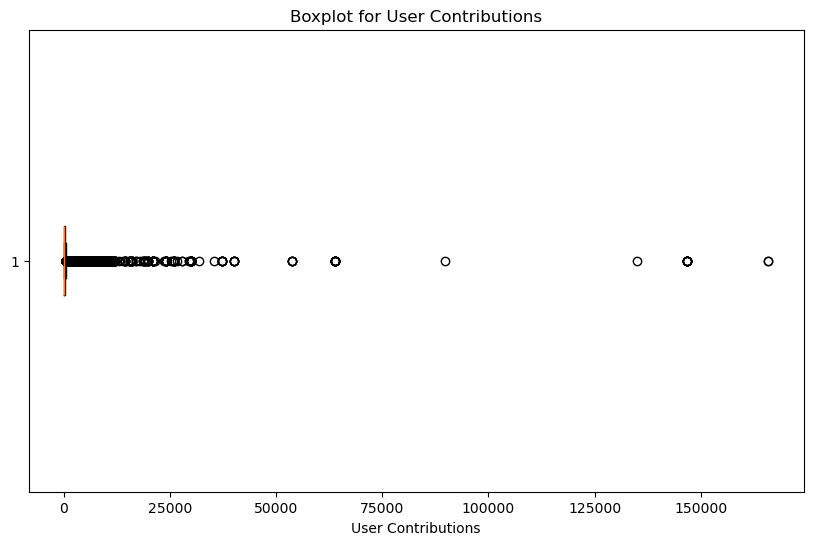

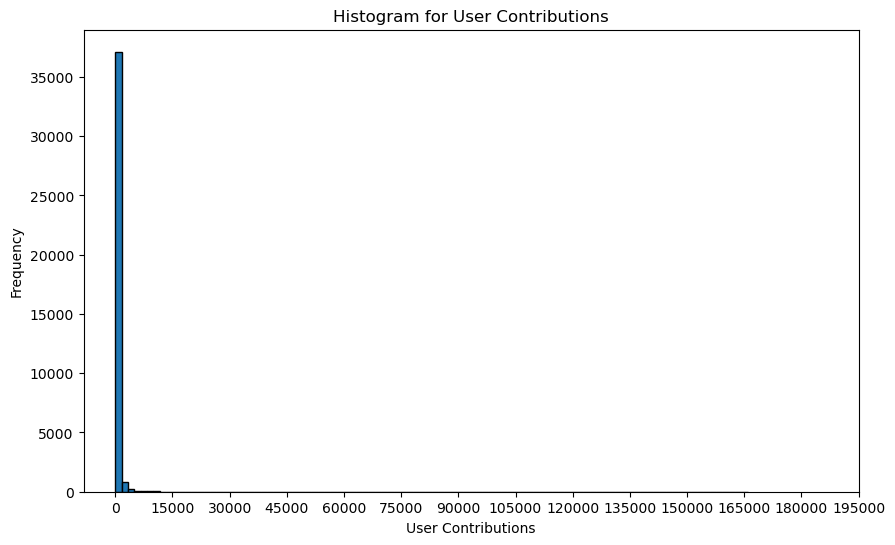

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_data_duplicates['userContributions'], vert=False)
plt.title("Boxplot for User Contributions")
plt.xlabel("User Contributions")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data_duplicates['userContributions'], bins=100, edgecolor='black')
plt.xticks(range(0, 200000, 15000))
plt.title("Histogram for User Contributions")
plt.xlabel("User Contributions")
plt.ylabel("Frequency")
plt.show()


 On the histogram we could not see quite well the outliers, whereas on the box plot we can see a some of them.  

We decided to calculate percentiles and quartiles to understand how the values ​​in a data set are distributed and identify their relative position in relation to other values.

In [24]:
datad = pd.Series(cleaned_data_duplicates['userContributions'])

percentile_25 = datad.quantile(0.25)
percentile_50 = datad.quantile(0.50) 
percentile_75 = datad.quantile(0.75)

print("25 Percentile(Q1)", percentile_25)
print("50 Percentile(Q2)", percentile_50)
print("75 Percentile(Q3)", percentile_75)

25 Percentile(Q1) 21.0
50 Percentile(Q2) 68.0
75 Percentile(Q3) 217.0


 We observed that 25% of users contributed with 21 reviews or fewer, 50% contributed up to 68 reviews, and 75% contributed up to 217 reviews.
These results show that the majority of users contributed up to 217 reviews (75%).

Following this, to make an accurate decision, we chose to use the IQR method and analyze the percentage that these users represent in our dataset.

In [25]:
Q1_userContributions = cleaned_data_duplicates['userContributions'].quantile(0.25)  
Q3_userContributions = cleaned_data_duplicates['userContributions'].quantile(0.75)  
IQR_userContributions = Q3_userContributions - Q1_userContributions

lower_bound_userContributions = Q1_userContributions - 1.5 * IQR_userContributions
upper_bound_userContributions = Q3_userContributions + 1.5 * IQR_userContributions

initial_rows = cleaned_data_duplicates.shape[0]
filtered_rows = cleaned_data_duplicates[
    (cleaned_data_duplicates['userContributions'] >= lower_bound_userContributions) &
    (cleaned_data_duplicates['userContributions'] <= upper_bound_userContributions)
].shape[0]

rows_removed = initial_rows - filtered_rows

percentage_within_bounds = (filtered_rows / initial_rows) * 100
percentage_outliers = 100 - percentage_within_bounds

print("Number of outlier rows:", rows_removed, "out of", initial_rows, "total rows.")
print("Percentage of outliers: ", percentage_outliers, "%")



Number of outlier rows: 4741 out of 38620 total rows.
Percentage of outliers:  12.276022786121175 %


That makes a 12.28% of outlier rows. We decided to continue with deletion, because those outliers had suspect values compared with the percentiles, they could be bots. 



In [26]:
filtered_data = cleaned_data_duplicates[
    (cleaned_data_duplicates['userContributions'] >= lower_bound_userContributions) &
    (cleaned_data_duplicates['userContributions'] <= upper_bound_userContributions)
]

Based on the images below, we can see that all the outliers have been successfully removed.

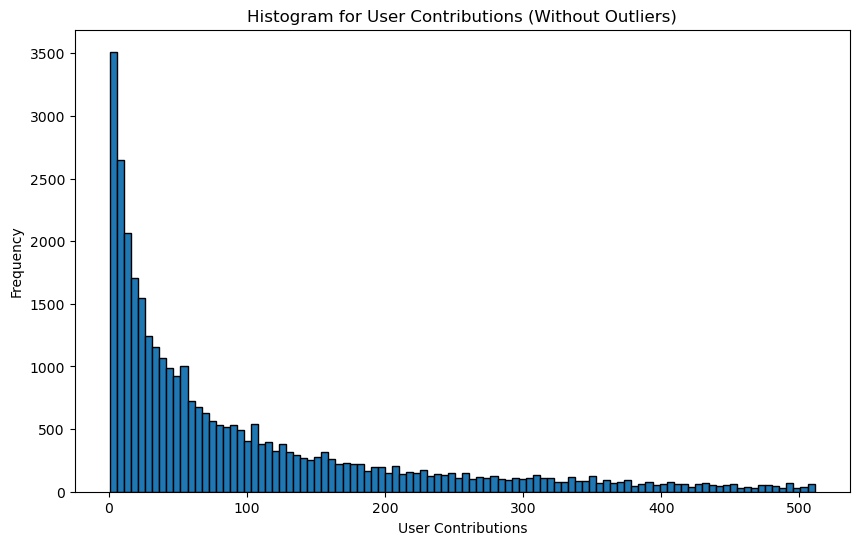

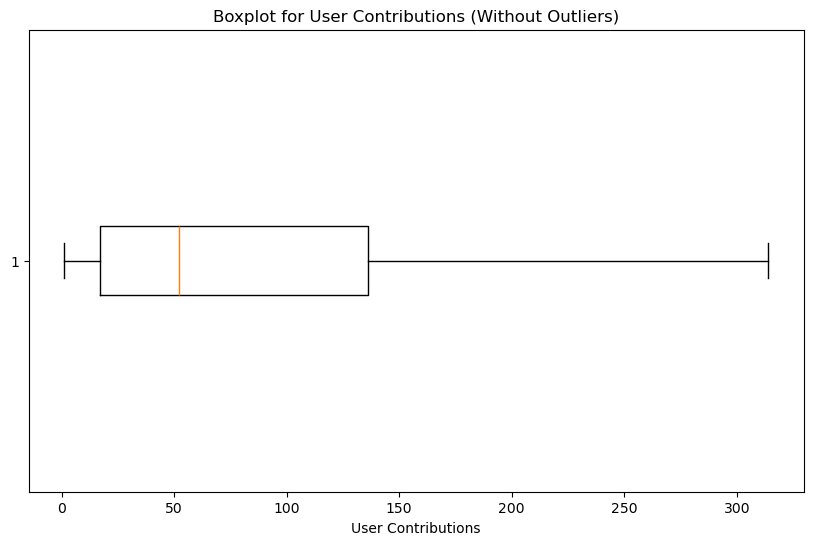

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['userContributions'], bins=100, edgecolor='black')
plt.title("Histogram for User Contributions (Without Outliers)")
plt.xlabel("User Contributions")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['userContributions'], vert=False, showfliers=False)
plt.title("Boxplot for User Contributions (Without Outliers)")
plt.xlabel("User Contributions")
plt.show()


The cleaned dataset will now be used in the modeling phase.

In [14]:
filtered_data.to_csv('cleaned_data.csv', sep=';', index=False)